# AirQualityPy

In [69]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import numpy as np
import json
import time
import datetime
import matplotlib.dates as mdate
from config1 import api_key
import csv
from scipy.stats import linregress

### Air Quality Status for North Carolina

In [3]:
# Get the NC cities list 
url = "https://api.airvisual.com/v2/cities?state=North Carolina&country=USA&key="
# Build query URL
query_url = url + api_key

# Get the citiy list for NC
cities_response = requests.get(query_url)
nc_city = cities_response.json()
pprint(nc_city)

{'data': [{'city': 'Albemarle'},
          {'city': 'Angier'},
          {'city': 'Asheville'},
          {'city': 'Beaufort'},
          {'city': 'Belville'},
          {'city': 'Boone'},
          {'city': 'Brevard'},
          {'city': 'Bryson City'},
          {'city': 'Buies Creek'},
          {'city': 'Candor'},
          {'city': 'Canton'},
          {'city': 'Cary'},
          {'city': 'Chapel Hill'},
          {'city': 'Charlotte'},
          {'city': 'Clyde'},
          {'city': 'Concord'},
          {'city': 'Cullowhee'},
          {'city': 'Durham'},
          {'city': 'Edenton'},
          {'city': 'Elizabeth City'},
          {'city': 'Fayetteville'},
          {'city': 'Foscoe'},
          {'city': 'Fuquay-Varina'},
          {'city': 'Gorman'},
          {'city': 'Greensboro'},
          {'city': 'Greenville'},
          {'city': 'Hendersonville'},
          {'city': 'Hickory'},
          {'city': 'Holly Springs'},
          {'city': 'Hope Mills'},
          {'city': 'H

In [4]:
# Print the city list dict.
nc_city_list = nc_city["data"]
print(nc_city_list)

[{'city': 'Albemarle'}, {'city': 'Angier'}, {'city': 'Asheville'}, {'city': 'Beaufort'}, {'city': 'Belville'}, {'city': 'Boone'}, {'city': 'Brevard'}, {'city': 'Bryson City'}, {'city': 'Buies Creek'}, {'city': 'Candor'}, {'city': 'Canton'}, {'city': 'Cary'}, {'city': 'Chapel Hill'}, {'city': 'Charlotte'}, {'city': 'Clyde'}, {'city': 'Concord'}, {'city': 'Cullowhee'}, {'city': 'Durham'}, {'city': 'Edenton'}, {'city': 'Elizabeth City'}, {'city': 'Fayetteville'}, {'city': 'Foscoe'}, {'city': 'Fuquay-Varina'}, {'city': 'Gorman'}, {'city': 'Greensboro'}, {'city': 'Greenville'}, {'city': 'Hendersonville'}, {'city': 'Hickory'}, {'city': 'Holly Springs'}, {'city': 'Hope Mills'}, {'city': 'Huntersville'}, {'city': 'Jamesville'}, {'city': 'Kannapolis'}, {'city': 'Kill Devil Hills'}, {'city': 'Lenoir'}, {'city': 'Lexington'}, {'city': 'Lowell'}, {'city': 'Marvin'}, {'city': 'Matthews'}, {'city': 'Morrisville'}, {'city': 'Mount Holly'}, {'city': 'Mount Olive'}, {'city': 'Myrtle Grove'}, {'city': '

In [5]:
# Create nc city list
city =[ nc_city_list["city"] for nc_city_list in nc_city_list]
print(city)

['Albemarle', 'Angier', 'Asheville', 'Beaufort', 'Belville', 'Boone', 'Brevard', 'Bryson City', 'Buies Creek', 'Candor', 'Canton', 'Cary', 'Chapel Hill', 'Charlotte', 'Clyde', 'Concord', 'Cullowhee', 'Durham', 'Edenton', 'Elizabeth City', 'Fayetteville', 'Foscoe', 'Fuquay-Varina', 'Gorman', 'Greensboro', 'Greenville', 'Hendersonville', 'Hickory', 'Holly Springs', 'Hope Mills', 'Huntersville', 'Jamesville', 'Kannapolis', 'Kill Devil Hills', 'Lenoir', 'Lexington', 'Lowell', 'Marvin', 'Matthews', 'Morrisville', 'Mount Holly', 'Mount Olive', 'Myrtle Grove', 'Newland', 'Ogden', 'Otto', 'Pittsboro', 'Princeton', 'Raleigh', 'Roanoke Rapids', 'Robbinsville', 'Roxboro', 'Royal Pines', 'Rural Hall', 'Rutherfordton', 'Scotts Mill', 'Siler City', 'Smithfield', 'Southport', 'Spruce Pine', 'Statesville', 'Surf City', 'Taylorsville', 'Township of Taylorsville', 'Trenton', 'Wilmington', 'Winston-Salem']


In [42]:
# Create the base url
url = "https://api.airvisual.com/v2/city?city="

# Create the city list for desired data
#city = ["Raleigh", "Asheville", "Charlotte", "Wilmington", "New Bern", "Rocky Mount", "Fayetteville"] 

# Create an output list to hold request results
output = []

# Loop through the cities to perform requests
for c in city:
    query_url = url + c +"&state=North Carolina&country=USA&" + "&key=" + api_key  
    response = requests.get(query_url).json()
    
    # Put results to the output list
    output.append(response)
    
    time.sleep(10)

# Display the data
pprint(output)

[{'data': {'city': 'Albemarle',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 11,
                                     'aqius': 33,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-07T00:00:00.000Z'},
                       'weather': {'hu': 78,
                                   'ic': '04n',
                                   'pr': 1024,
                                   'tp': 23,
                                   'ts': '2019-10-06T23:00:00.000Z',
                                   'wd': 28,
                                   'ws': 2.5}},
           'location': {'coordinates': [-80.197647, 35.367097],
                        'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'},
 {'data': {'city': 'Angier',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 6,
                                     '

           'location': {'coordinates': [-80.29338, 36.24042], 'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'},
 {'data': {'city': 'Rutherfordton',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 8,
                                     'aqius': 24,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-07T00:00:00.000Z'},
                       'weather': {'hu': 93,
                                   'ic': '04n',
                                   'pr': 1024,
                                   'tp': 18,
                                   'ts': '2019-10-07T00:00:00.000Z',
                                   'wd': 360,
                                   'ws': 1.5}},
           'location': {'coordinates': [-82.045979, 35.420068],
                        'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'}

In [43]:
# Create lists to hold necessary data
city_name = []
state = []
country_name = []
air_quality = []
main_pollutant = []
humidity = []
pressure = []
temperature = []
wind_speed = []
date = []
lat = []
lng = []

# Select the variables and put them in relative lists
for i in range(len(output)):
    city_name.append(output[i]['data']['city'])    
    state.append(output[i]['data']['state'])
    country_name.append(output[i]['data']['country'])
    air_quality.append(output[i]['data']['current']['pollution']['aqius'])
    humidity.append(output[i]['data']['current']['weather']['hu'])
    pressure.append(output[i]['data']['current']['weather']['pr'])
    temperature.append(output[i]['data']['current']['weather']['tp'])
    wind_speed.append(output[i]['data']['current']['weather']['ws'])
    date.append(output[i]['data']['current']['pollution']['ts'])
    main_pollutant.append(output[i]['data']['current']['pollution']['mainus'])
    lat.append(output[i]['data']['location']['coordinates'][0])
    lng.append(output[i]['data']['location']['coordinates'][1])

In [44]:
# Create the dictionary to hold data
air_data = {"City": city_name,
             "State": state,
             "Country": country_name,
             "Latitude": lat,
             "Longitude": lng,
             "Air Quality": air_quality,
             "Main Pollutant": main_pollutant,
             "Humidity": humidity,
             "Pressure": pressure,
             "Temperature": temperature,
             "Wind Speed": wind_speed,
             "Date": date
           }
# Convert dictionary to a dataframe
air_df = pd.DataFrame(air_data)
air_df

,City,State,Country,Latitude,Longitude,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Albemarle,North Carolina,USA,-80.197647,35.367097,33,p2,78,1024,23,2.50,2019-10-07T00:00:00.000Z
1,Angier,North Carolina,USA,-78.727767,35.555932,17,p2,69,1023,22,2.96,2019-10-07T00:00:00.000Z
2,Asheville,North Carolina,USA,-82.583300,35.607500,4,p2,88,1025,17,2.60,2019-10-06T21:00:00.000Z
3,Beaufort,North Carolina,USA,-76.663820,34.718220,16,o3,69,1024,22,2.10,2019-10-06T22:00:00.000Z
4,Belville,North Carolina,USA,-77.945588,34.206962,3,p2,60,1023,23,2.60,2019-10-07T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Taylorsville,North Carolina,USA,-81.168005,35.930378,27,p2,100,1026,18,0.63,2019-10-07T00:00:00.000Z
63,Township of Taylorsville,North Carolina,USA,-81.191000,35.913900,45,p2,100,1026,18,0.63,2019-10-06T21:00:00.000Z
64,Trenton,North Carolina,USA,-77.312646,35.051847,3,p2,69,1024,21,2.10,2019-10-07T00:00:00.000Z
65,Wilmington,North Carolina,USA,-77.861700,34.356100,7,p2,69,1023,22,3.60,2019-10-07T00:00:00.000Z


In [45]:
# Check to data types
print(air_df.dtypes)

City               object
State              object
Country            object
Latitude          float64
Longitude         float64
Air Quality         int64
Main Pollutant     object
Humidity            int64
Pressure            int64
Temperature         int64
Wind Speed        float64
Date               object
dtype: object


In [46]:
# Convert date data type to datetime and select only date values
air_df["Date"] = pd.to_datetime(air_df["Date"])
air_df["Date"] = air_df["Date"].dt.date
# Display the data frame with new date values
air_df

,City,State,Country,Latitude,Longitude,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Albemarle,North Carolina,USA,-80.197647,35.367097,33,p2,78,1024,23,2.50,2019-10-07
1,Angier,North Carolina,USA,-78.727767,35.555932,17,p2,69,1023,22,2.96,2019-10-07
2,Asheville,North Carolina,USA,-82.583300,35.607500,4,p2,88,1025,17,2.60,2019-10-06
3,Beaufort,North Carolina,USA,-76.663820,34.718220,16,o3,69,1024,22,2.10,2019-10-06
4,Belville,North Carolina,USA,-77.945588,34.206962,3,p2,60,1023,23,2.60,2019-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Taylorsville,North Carolina,USA,-81.168005,35.930378,27,p2,100,1026,18,0.63,2019-10-07
63,Township of Taylorsville,North Carolina,USA,-81.191000,35.913900,45,p2,100,1026,18,0.63,2019-10-06
64,Trenton,North Carolina,USA,-77.312646,35.051847,3,p2,69,1024,21,2.10,2019-10-07
65,Wilmington,North Carolina,USA,-77.861700,34.356100,7,p2,69,1023,22,3.60,2019-10-07


In [58]:
# Save the dataframe as csv
nc_air_quality = air_df.to_csv("output/nc_air_quality.csv", index=False, header=True)

### Air Quality Index Status for NC cities

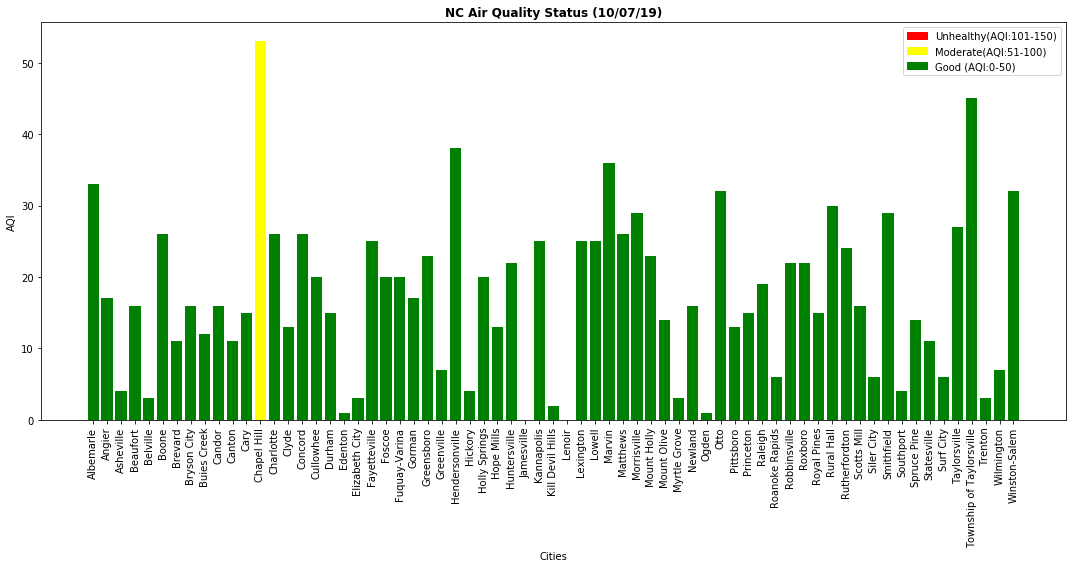

In [97]:
# Create a line chart to show air quality index change for each city
# Change the color depending on the air quality index
plt.figure(figsize=(15,8))

colors = ["green" if x <= 50 else "yellow" if x <= 100 else "orange" for x in air_df["Air Quality"]]
plt.bar(air_df["City"], air_df["Air Quality"], align="center", color = colors)

# Add labels 
plt.xticks(air_df["City"], rotation = 90)
plt.title("NC Air Quality Status (%s)" % time.strftime("%x"), fontweight="bold")
plt.ylabel("AQI")
plt.xlabel("Cities")

# Add lagend
colors1 = {"Unhealthy(AQI:101-150)": "red", "Moderate(AQI:51-100)": "yellow", "Good (AQI:0-50)": "green"}
labels = list(colors1.keys())
handles= [plt.Rectangle((0,0),1,1, color=colors1[label]) for label in labels]
plt.legend(handles,labels)



# Save the plot
plt.tight_layout()
plt.savefig("Output/air_quality.png")
plt.show()

### Air Quality, Humidity Relationship

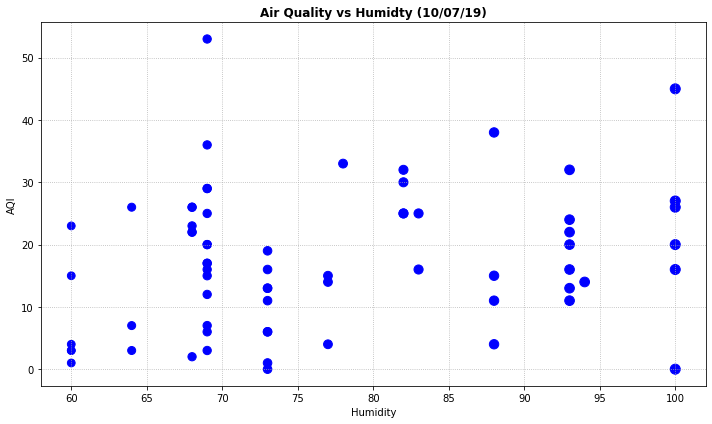

In [79]:

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(air_df["Humidity"], air_df["Air Quality"], marker = "o", color = "blue", s=air_df["Humidity"])

                                                

# Add Labels
plt.title("Air Quality vs Humidty (%s)" % time.strftime("%x"), fontweight="bold")
plt.xlabel("Humidity")
plt.ylabel("AQI")
plt.grid(linestyle=":")

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_humidity.png")
plt.show()

### Air Quality, Temperature Relationship

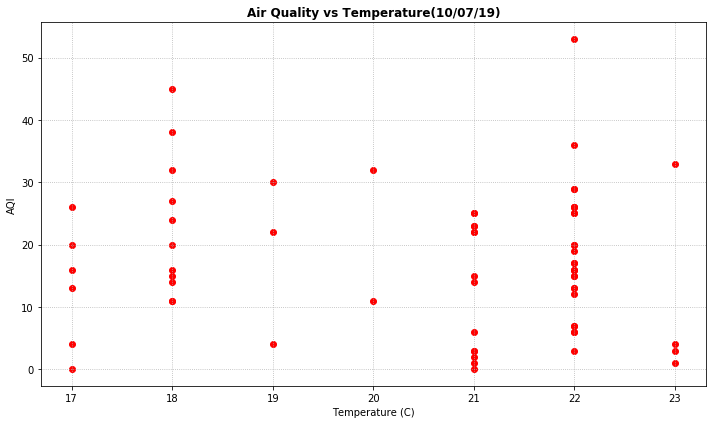

In [80]:

# Create plots for temprature and air quality 
plt.figure(figsize=(10,6))
plt.scatter(air_df["Temperature"], air_df["Air Quality"], marker="o", color = "red")

# Add Labels
plt.xlabel("Temperature (C)")
plt.ylabel("AQI")
plt.title("Air Quality vs Temperature(%s)" % time.strftime("%x"), fontweight="bold")
tick_locations = air_df["Temperature"]
plt.grid(linestyle=":")

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_temp.png")
plt.show()

### Air Quality,  Air Pressure Relationship


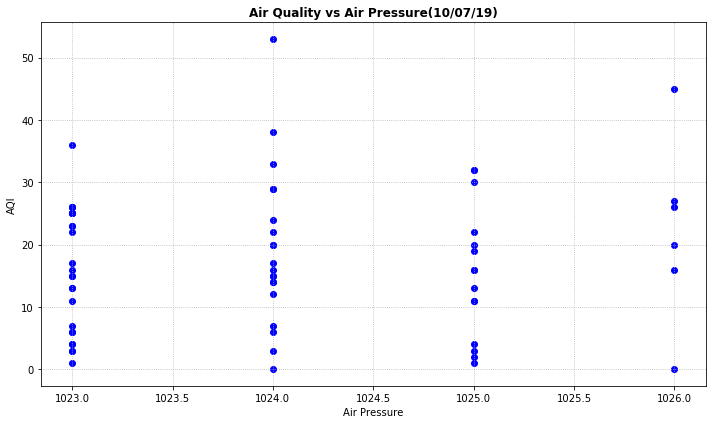

In [81]:

# Create plots for temprature and air quality 
plt.figure(figsize=(10,6))
plt.scatter(air_df["Pressure"], air_df["Air Quality"], marker="o", color = "blue")

# Add labels
plt.xlabel("Air Pressure")
plt.ylabel("AQI")
plt.title("Air Quality vs Air Pressure(%s)" % time.strftime("%x"), fontweight="bold")
tick_locations = air_df["Pressure"]
plt.grid(linestyle=":")

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_pressure.png")
plt.show()

### Analysis for North Carolina Cities

* The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is. This part of the project makes analysis for North Carolina cities. The questions are what is the air quality in North Carolina? Is there any relationship between weather and air quality? Such as high temperature and air quality, humidity and air quality, and air pressure and air quality.

* First part was to create json request to get airquality and weather information for each city data that is available on AirVisual for NC.
* After getting the response for each city, the aim was to select the necessary data, such as city names, teperature, aqi, humidity, from the response to create a data frame to organize the data.  

* Cleaning the data includes updating the date values on the data frame for plots. So we could understand data belongs to a specific date. Because AirVisual gives current data for cities.

* EPA (Environmental Protection Agency) has assigned a specific color to each AQI category to make it easier for people to understand quickly whether air pollution is reaching unhealthy levels in their communities.
 - Color green means AQI<50 and considered healty.
 - Yellow means AQI is betwwen 51-100, and it is moderate.
 - Orange means AQI is between 101-150, and it is unhealty for sensitive groups.
 - Red means AQI is between 151 and 200, and it is unhealty for everyone.
 - Purple means AQI is between 201 and 300, and it stands for very unhealthy alarm.
 - Maroon means AQI is greater than 301 and it is hazardous. 
 
* Bar plot shows the status for each NC cities, and gives an overview of the state's air quality index number. So, we can say for the sepesific day, air quality is generally within healty limits. 

* Air Quality vs temperature, humidity and air pressure for each cities doesn't create a trend for the specific date, so it is not possible to conclude that only high temperature, high air pressure or high humidity has impact on air quality.


* As a conclusion, the weather can have a significant impact on air quality since different aspects of the weather affect the amounts of ozone and particulates that are present in a specific area. However, from this analysis we can't prove any relation between temperature, humidity, air pressure and air quality index for NC cities. Since, there are other important parameters that impact air quality such as population and industrialization, these plots doesn't show any realtion for weather and AQI. 